In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [90]:
df = pd.read_csv("cars (1).csv")
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28,16845
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25,19045
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23,21485
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27,22470


In [91]:
df['normalized-losses'].replace("?",np.nan,inplace=True)
df['horsepower'].replace("?",np.nan,inplace=True)

In [92]:
df['normalized-losses'] = df['normalized-losses'].astype('float')
df['horsepower'] = df['horsepower'].astype(float)

In [93]:
# lets Replace the "Nan" with Mean using Simple Imputator or KNN Imputor
from sklearn.impute import SimpleImputer

In [94]:
# lets create the Object of the Class
si = SimpleImputer(strategy="mean")


In [95]:
df[['normalized-losses','horsepower']] = si.fit_transform(df[['normalized-losses','horsepower']])

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 24.1+ KB


<AxesSubplot:xlabel='price'>

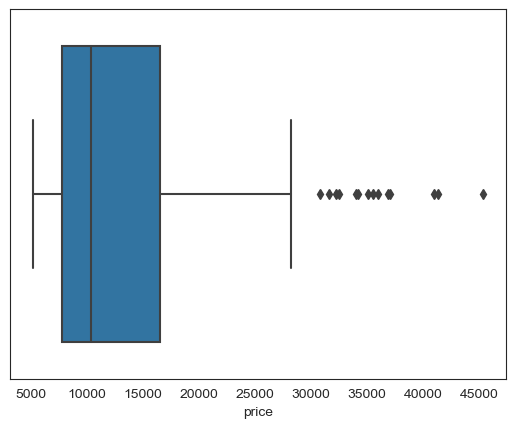

In [97]:
sns.boxplot(data=df,x="price")

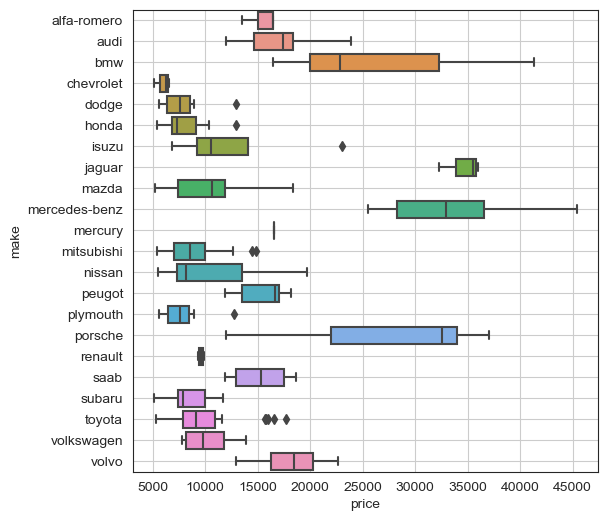

In [98]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df,x="price",y="make")
plt.grid()

In [99]:
def convert(col,other):
    f_df = pd.DataFrame(columns=df.columns)
    for i in df[other].unique():
        temp_df  = df[df[other]==i]
        q1 = temp_df[col].quantile(0.25)
        q3 = temp_df[col].quantile(0.75)
        iqr=q3-q1
        min_val = q1-(1.5*iqr)
        max_val = q3+(1.5*iqr)
        temp_df = temp_df[(temp_df[col]>=min_val) & (temp_df[col]<=max_val)]
        f_df = pd.merge(f_df,temp_df,how="outer")
    return (f_df)

In [100]:
new_df = convert('price','make')
df = new_df
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114.0,23,28,16845
190,-1,95.0,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160.0,19,25,19045
191,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134.0,18,23,21485
192,-1,95.0,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106.0,26,27,22470


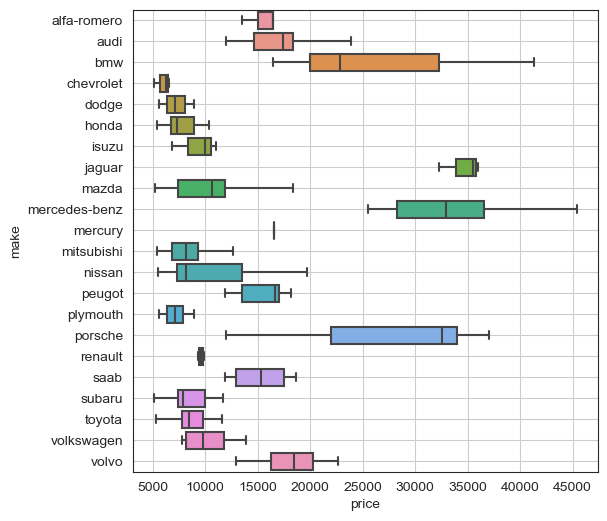

In [101]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df,x="price",y="make")
plt.grid()

In [102]:
colname = df.select_dtypes(['int64','float64']).columns

In [103]:
colname

Index(['symboling', 'normalized-losses', 'width', 'height', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [104]:
df[colname]

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...
189,-1,95.0,68.9,55.5,141,114.0,23,28,16845
190,-1,95.0,68.8,55.5,141,160.0,19,25,19045
191,-1,95.0,68.9,55.5,173,134.0,18,23,21485
192,-1,95.0,68.9,55.5,145,106.0,26,27,22470


In [105]:
from scipy.stats import skew

In [106]:
skew(df['normalized-losses'])

0.848205953606264

symboling
0.21386866184357742


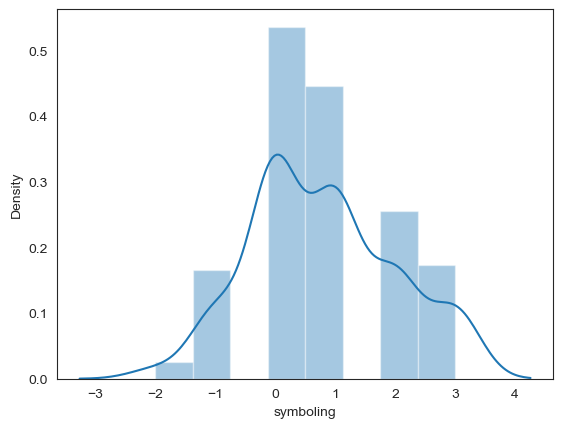

normalized-losses
0.848205953606264


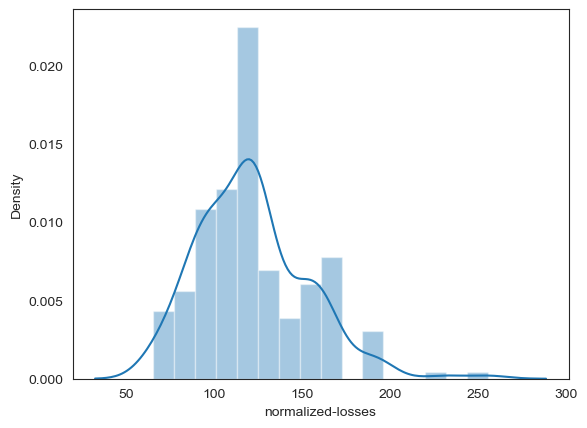

width
0.9140400320504322


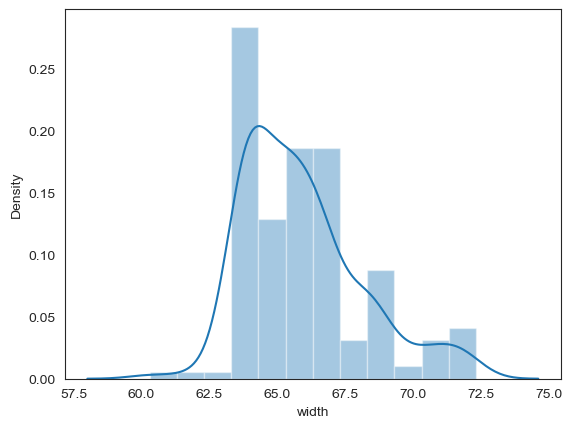

height
0.013839962443639326


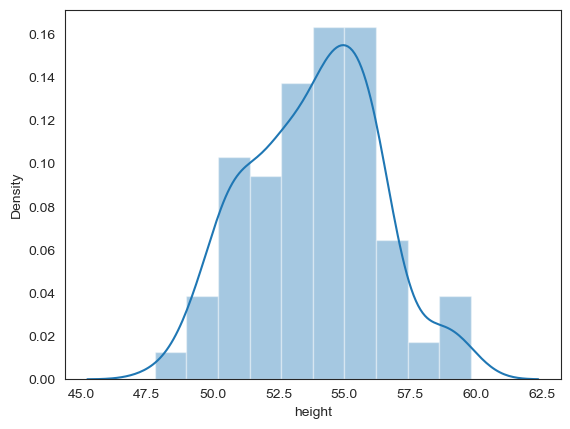

engine-size
2.0541257626466156


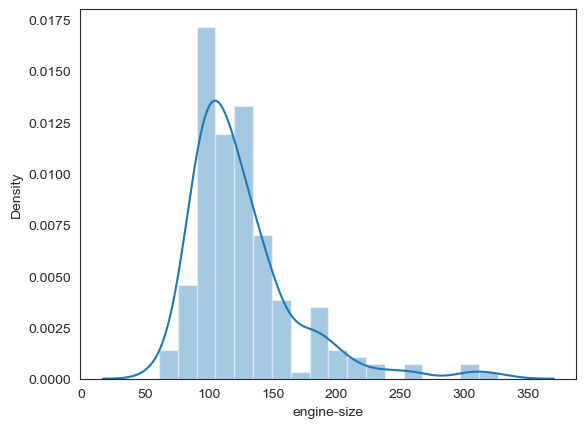

horsepower
1.5556576549504106


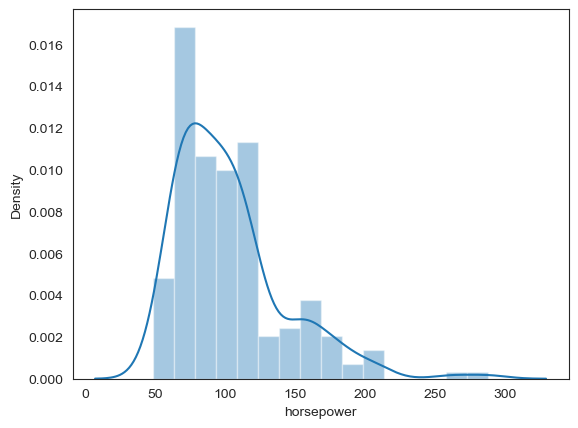

city-mpg
0.5999073033714895


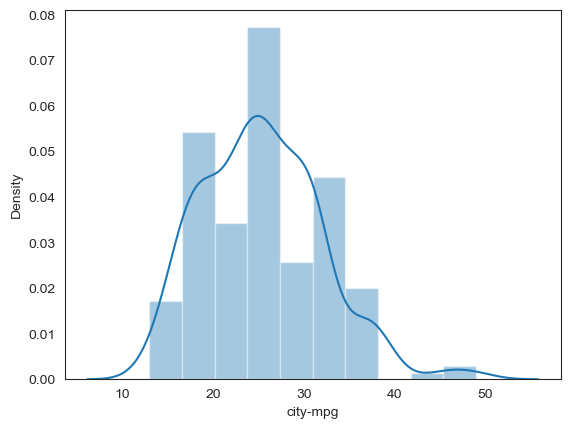

highway-mpg
0.4760310091695327


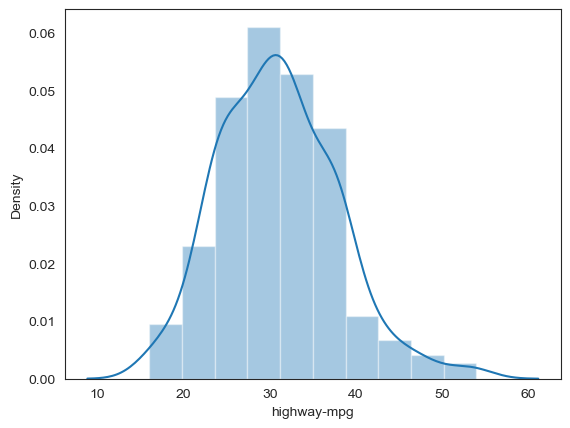

price
1.8166794702973463


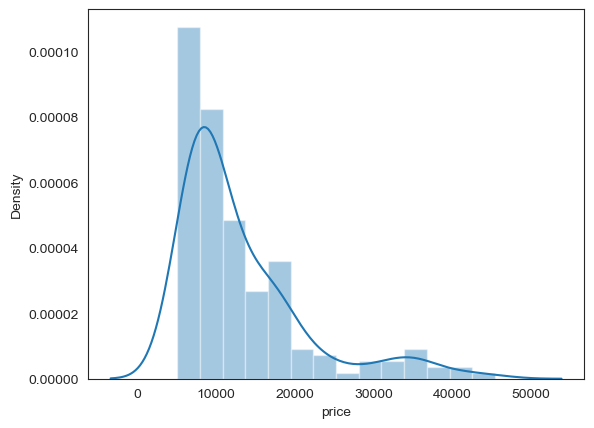

In [107]:
for col in df[colname]:
    print(col)
    print(skew(df[col]))
    sns.distplot(df[col])
    plt.show()

In [108]:
df.corr()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.447922,-0.272388,-0.521495,-0.153671,0.027074,0.007189,0.084238,-0.095905
normalized-losses,0.447922,1.000000,0.066622,-0.368540,0.090258,0.183385,-0.212276,-0.168904,0.129973
width,-0.272388,0.066622,1.000000,0.296011,0.735112,0.643906,-0.641401,-0.677911,0.730503
height,-0.521495,-0.368540,0.296011,1.000000,0.096041,-0.078245,-0.078815,-0.142926,0.147010
engine-size,-0.153671,0.090258,0.735112,0.096041,1.000000,0.803956,-0.642711,-0.667078,0.869638
horsepower,0.027074,0.183385,0.643906,-0.078245,0.803956,1.000000,-0.797166,-0.761009,0.768921
city-mpg,0.007189,-0.212276,-0.641401,-0.078815,-0.642711,-0.797166,1.000000,0.970113,-0.680412
highway-mpg,0.084238,-0.168904,-0.677911,-0.142926,-0.667078,-0.761009,0.970113,1.000000,-0.704846
price,-0.095905,0.129973,0.730503,0.147010,0.869638,0.768921,-0.680412,-0.704846,1.000000


In [109]:
skew(df["normalized-losses"])

0.848205953606264

In [110]:
df["normalized-losses"]=np.log(df["normalized-losses"])
skew(df['normalized-losses'])

0.018468899462087518

In [111]:
df.corr()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.469376,-0.272388,-0.521495,-0.153671,0.027074,0.007189,0.084238,-0.095905
normalized-losses,0.469376,1.000000,0.075228,-0.379698,0.103697,0.195058,-0.215628,-0.168380,0.142736
width,-0.272388,0.075228,1.000000,0.296011,0.735112,0.643906,-0.641401,-0.677911,0.730503
height,-0.521495,-0.379698,0.296011,1.000000,0.096041,-0.078245,-0.078815,-0.142926,0.147010
engine-size,-0.153671,0.103697,0.735112,0.096041,1.000000,0.803956,-0.642711,-0.667078,0.869638
horsepower,0.027074,0.195058,0.643906,-0.078245,0.803956,1.000000,-0.797166,-0.761009,0.768921
city-mpg,0.007189,-0.215628,-0.641401,-0.078815,-0.642711,-0.797166,1.000000,0.970113,-0.680412
highway-mpg,0.084238,-0.168380,-0.677911,-0.142926,-0.667078,-0.761009,0.970113,1.000000,-0.704846
price,-0.095905,0.142736,0.730503,0.147010,0.869638,0.768921,-0.680412,-0.704846,1.000000


## Handling Categorical data 

In [112]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,4.804021,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,4.804021,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,4.804021,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,5.099866,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,5.099866,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450


In [113]:
df['fuel-type']

0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
189       gas
190       gas
191       gas
192    diesel
193       gas
Name: fuel-type, Length: 194, dtype: object

In [114]:
df['fuel-type'].value_counts()

gas       174
diesel     20
Name: fuel-type, dtype: int64

In [115]:
pd.get_dummies(df['fuel-type'])

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
189,0,1
190,0,1
191,0,1
192,1,0


In [116]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,4.804021,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,4.804021,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,4.804021,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,5.099866,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,5.099866,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450


## Visualization

<AxesSubplot:xlabel='price', ylabel='Density'>

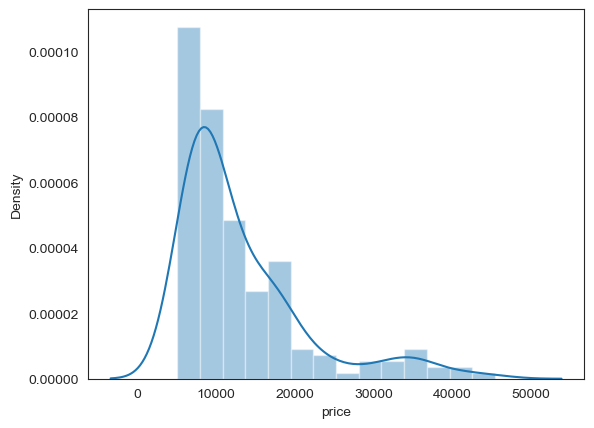

In [117]:
sns.distplot(df['price'])

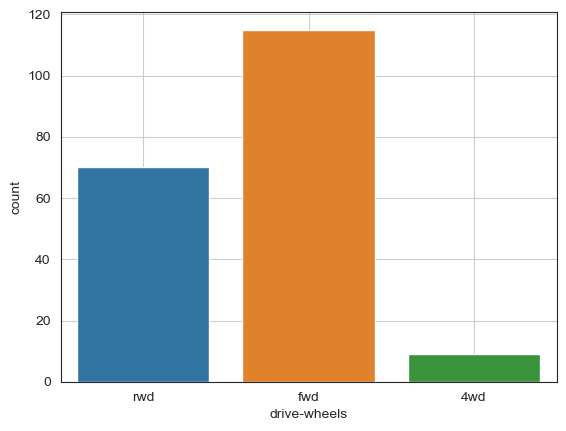

In [118]:
sns.countplot(x = df['drive-wheels'])
plt.grid()

## Pie- Chart 

In [119]:
df['body-style'].value_counts()

sedan          93
hatchback      64
wagon          24
hardtop         8
convertible     5
Name: body-style, dtype: int64

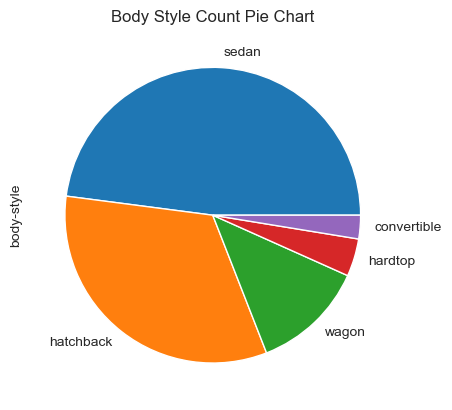

In [120]:
df['body-style'].value_counts().plot.pie()
plt.title('Body Style Count Pie Chart')
plt.show()

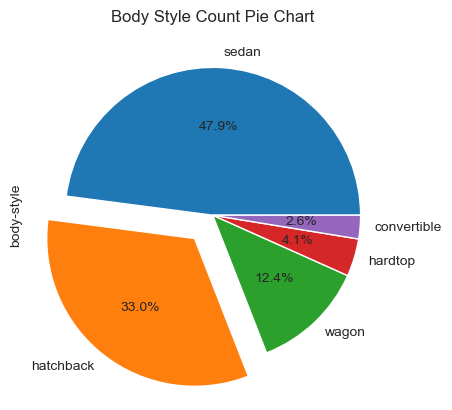

In [121]:
df['body-style'].value_counts().plot.pie(autopct = "%1.1f%%",
                                        explode = (0,0.2,0,0,0))
plt.title('Body Style Count Pie Chart')
plt.show()

## Scatterplot

Text(0, 0.5, 'Price')

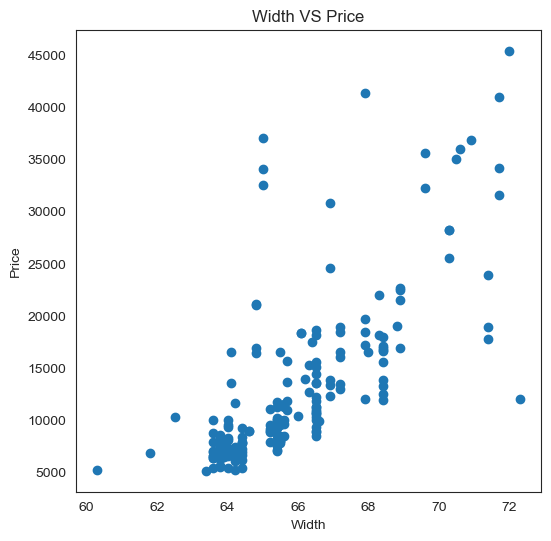

In [122]:
plt.figure(figsize=(6,6))
plt.scatter(x = df['width'],y = df['price'])
plt.title('Width VS Price')
plt.xlabel('Width')
plt.ylabel('Price')

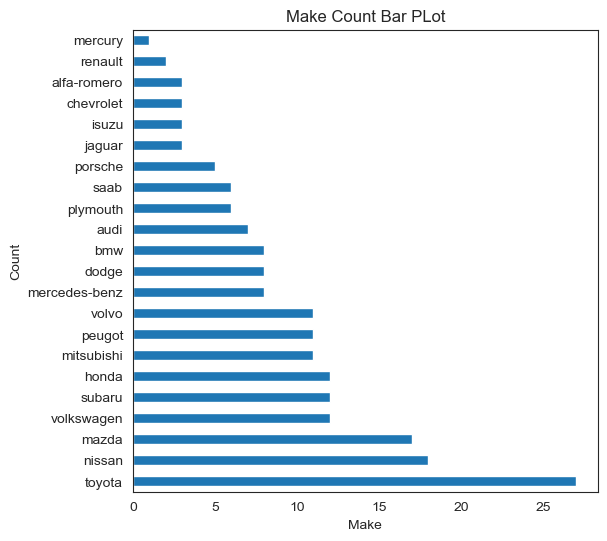

In [123]:
plt.figure(figsize=(6,6))
df.make.value_counts().plot(kind = 'barh')
sns.set_style('darkgrid')
plt.title("Make Count Bar PLot")
plt.xlabel('Make')
plt.ylabel('Count')
plt.show()

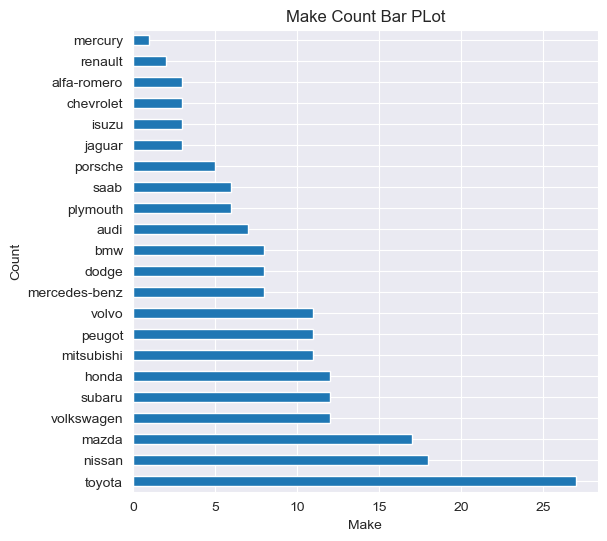

In [124]:
plt.figure(figsize=(6,6))
df.make.value_counts().plot(kind = 'barh')
sns.set_style('white')
plt.title("Make Count Bar PLot")
plt.xlabel('Make')
plt.ylabel('Count')
plt.show()

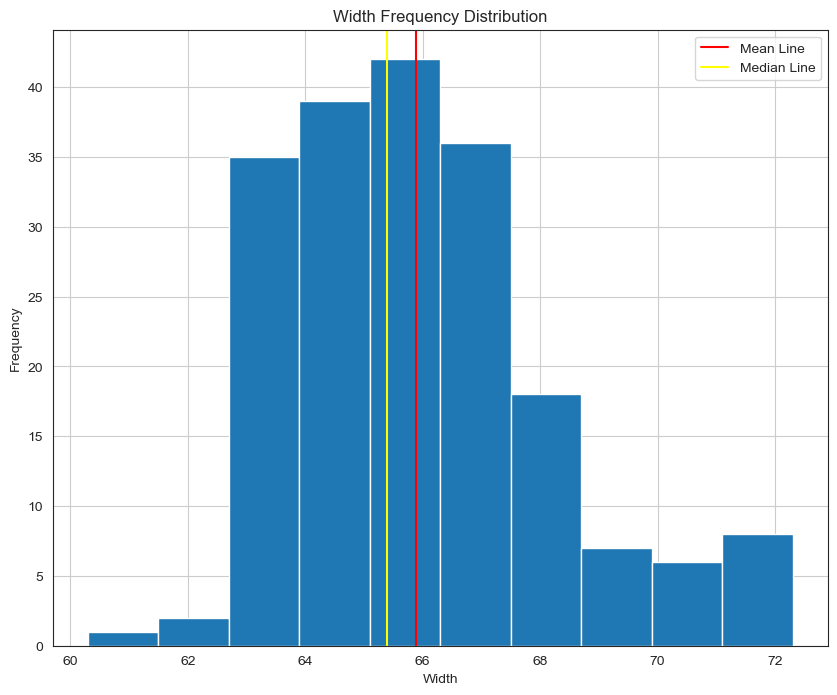

In [125]:
plt.figure(figsize=(10,8))

widthmean = df.width.mean()
widthmedian = df['width'].median()

plt.hist(df['width'],bins=10)
plt.title("Width Frequency Distribution")
plt.xlabel("Width")
plt.ylabel('Frequency')

plt.axvline(widthmean,color = 'red',label = 'Mean Line')
plt.axvline(widthmedian, color = 'yellow', label = 'Median Line')
plt.grid(True)
plt.legend()
plt.show()

In [126]:
pd.get_dummies(df['make'])

,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [127]:
from sklearn.preprocessing import OneHotEncoder

In [128]:
ohe = OneHotEncoder()

In [129]:
ohe.fit_transform(df[['make']]).toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

## Label Encoding

In [130]:
from sklearn.preprocessing import LabelEncoder

In [131]:
le = LabelEncoder()

In [132]:
le.fit_transform(df['make'])

array([ 0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  7,  7,  7,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,
        9,  9,  9,  9, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14,
       15, 15, 15, 15, 15, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 21])

In [133]:
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,4.804021,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,4.804021,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,4.804021,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,5.099866,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,5.099866,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,-1,4.553877,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114.0,23,28,16845
190,-1,4.553877,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160.0,19,25,19045
191,-1,4.553877,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134.0,18,23,21485
192,-1,4.553877,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106.0,26,27,22470


## Ordinal Encoder

In [134]:
from sklearn.preprocessing import OrdinalEncoder

In [135]:
oe = OrdinalEncoder()

In [136]:
oe.fit_transform(df[['make','body-style']])

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  2.],
       [ 1.,  3.],
       [ 1.,  3.],
       [ 1.,  3.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  3.],
       [ 1.,  2.],
       [ 2.,  3.],
       [ 2.,  3.],
       [ 2.,  3.],
       [ 2.,  3.],
       [ 2.,  3.],
       [ 2.,  3.],
       [ 2.,  3.],
       [ 2.,  3.],
       [ 3.,  2.],
       [ 3.,  2.],
       [ 3.,  3.],
       [ 4.,  2.],
       [ 4.,  2.],
       [ 4.,  2.],
       [ 4.,  2.],
       [ 4.,  3.],
       [ 4.,  3.],
       [ 4.,  3.],
       [ 4.,  4.],
       [ 5.,  2.],
       [ 5.,  2.],
       [ 5.,  2.],
       [ 5.,  2.],
       [ 5.,  2.],
       [ 5.,  3.],
       [ 5.,  4.],
       [ 5.,  2.],
       [ 5.,  2.],
       [ 5.,  3.],
       [ 5.,  3.],
       [ 5.,  3.],
       [ 6.,  3.],
       [ 6.,  3.],
       [ 6.,  2.],
       [ 7.,  3.],
       [ 7.,  3.],
       [ 7.,  3.],
       [ 8.,  2.],
       [ 8.,  2.],
       [ 8.,  2.],
       [ 8.,  3.],
       [ 8.,  3.],
       [ 8.,

In [137]:
catcol = df.select_dtypes(object).columns

In [138]:
catcol

Index(['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type'],
      dtype='object')

In [139]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

df[catcol] = oe.fit_transform(df[catcol])

In [140]:
df[catcol]

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0.0,1.0,0.0,2.0,0.0,0.0
1,0.0,1.0,0.0,2.0,0.0,0.0
2,0.0,1.0,2.0,2.0,0.0,5.0
3,1.0,1.0,3.0,1.0,0.0,3.0
4,1.0,1.0,3.0,0.0,0.0,3.0
...,...,...,...,...,...,...
189,21.0,1.0,3.0,2.0,0.0,3.0
190,21.0,1.0,3.0,2.0,0.0,3.0
191,21.0,1.0,3.0,2.0,0.0,5.0
192,21.0,0.0,3.0,2.0,0.0,3.0


In [141]:
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,4.804021,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27,13495
1,3,4.804021,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27,16500
2,1,4.804021,0.0,1.0,2.0,2.0,0.0,65.5,52.4,5.0,152,154.0,19,26,16500
3,2,5.099866,1.0,1.0,3.0,1.0,0.0,66.2,54.3,3.0,109,102.0,24,30,13950
4,2,5.099866,1.0,1.0,3.0,0.0,0.0,66.4,54.3,3.0,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,-1,4.553877,21.0,1.0,3.0,2.0,0.0,68.9,55.5,3.0,141,114.0,23,28,16845
190,-1,4.553877,21.0,1.0,3.0,2.0,0.0,68.8,55.5,3.0,141,160.0,19,25,19045
191,-1,4.553877,21.0,1.0,3.0,2.0,0.0,68.9,55.5,5.0,173,134.0,18,23,21485
192,-1,4.553877,21.0,0.0,3.0,2.0,0.0,68.9,55.5,3.0,145,106.0,26,27,22470


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 193
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          194 non-null    int64  
 1   normalized-losses  194 non-null    float64
 2   make               194 non-null    float64
 3   fuel-type          194 non-null    float64
 4   body-style         194 non-null    float64
 5   drive-wheels       194 non-null    float64
 6   engine-location    194 non-null    float64
 7   width              194 non-null    float64
 8   height             194 non-null    float64
 9   engine-type        194 non-null    float64
 10  engine-size        194 non-null    int64  
 11  horsepower         194 non-null    float64
 12  city-mpg           194 non-null    int64  
 13  highway-mpg        194 non-null    int64  
 14  price              194 non-null    int64  
dtypes: float64(10), int64(5)
memory usage: 24.2 KB


## Scaling

In [143]:
n1 = 10#kg
n2 = 1000#gram

In [144]:
n1>n2

False

In [145]:
#There are Two Types Of Scaling

#1. MinMaxScaler
#2. StandardScaler

# MinMaxScaler (Normalization)

In [146]:
# xnew = (x-min)/(max-min)

In [147]:
a = np.array([1,2,3,4,5])
b = np.array([135,202,3032,4032,3250])
c = np.array([100,200,300,400,500])

In [148]:
def minmax(arr):
    xnew = (arr-arr.min())/(arr.max()-arr.min())
    return xnew

In [149]:
minmax(a)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [150]:
minmax(b)

array([0.        , 0.01719271, 0.74339235, 1.        , 0.79933282])

In [151]:
minmax(c)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [152]:
from sklearn.preprocessing import MinMaxScaler

In [153]:
mn = MinMaxScaler()

In [154]:
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,4.804021,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27,13495
1,3,4.804021,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27,16500
2,1,4.804021,0.0,1.0,2.0,2.0,0.0,65.5,52.4,5.0,152,154.0,19,26,16500
3,2,5.099866,1.0,1.0,3.0,1.0,0.0,66.2,54.3,3.0,109,102.0,24,30,13950
4,2,5.099866,1.0,1.0,3.0,0.0,0.0,66.4,54.3,3.0,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,-1,4.553877,21.0,1.0,3.0,2.0,0.0,68.9,55.5,3.0,141,114.0,23,28,16845
190,-1,4.553877,21.0,1.0,3.0,2.0,0.0,68.8,55.5,3.0,141,160.0,19,25,19045
191,-1,4.553877,21.0,1.0,3.0,2.0,0.0,68.9,55.5,5.0,173,134.0,18,23,21485
192,-1,4.553877,21.0,0.0,3.0,2.0,0.0,68.9,55.5,3.0,145,106.0,26,27,22470


In [155]:
df.iloc[:,:-1]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,4.804021,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27
1,3,4.804021,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27
2,1,4.804021,0.0,1.0,2.0,2.0,0.0,65.5,52.4,5.0,152,154.0,19,26
3,2,5.099866,1.0,1.0,3.0,1.0,0.0,66.2,54.3,3.0,109,102.0,24,30
4,2,5.099866,1.0,1.0,3.0,0.0,0.0,66.4,54.3,3.0,136,115.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,-1,4.553877,21.0,1.0,3.0,2.0,0.0,68.9,55.5,3.0,141,114.0,23,28
190,-1,4.553877,21.0,1.0,3.0,2.0,0.0,68.8,55.5,3.0,141,160.0,19,25
191,-1,4.553877,21.0,1.0,3.0,2.0,0.0,68.9,55.5,5.0,173,134.0,18,23
192,-1,4.553877,21.0,0.0,3.0,2.0,0.0,68.9,55.5,3.0,145,106.0,26,27


In [156]:
df.iloc[:,:-1]=mn.fit_transform(df.iloc[:,:-1])

In [158]:
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,1.0,0.459322,0.000000,1.0,0.00,1.0,0.0,0.316667,0.083333,0.000000,0.260377,0.262500,0.222222,0.289474,13495
1,1.0,0.459322,0.000000,1.0,0.00,1.0,0.0,0.316667,0.083333,0.000000,0.260377,0.262500,0.222222,0.289474,16500
2,0.6,0.459322,0.000000,1.0,0.50,1.0,0.0,0.433333,0.383333,0.833333,0.343396,0.441667,0.166667,0.263158,16500
3,0.8,0.675143,0.047619,1.0,0.75,0.5,0.0,0.491667,0.541667,0.500000,0.181132,0.225000,0.305556,0.368421,13950
4,0.8,0.675143,0.047619,1.0,0.75,0.0,0.0,0.508333,0.541667,0.500000,0.283019,0.279167,0.138889,0.157895,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,0.2,0.276840,1.000000,1.0,0.75,1.0,0.0,0.716667,0.641667,0.500000,0.301887,0.275000,0.277778,0.315789,16845
190,0.2,0.276840,1.000000,1.0,0.75,1.0,0.0,0.708333,0.641667,0.500000,0.301887,0.466667,0.166667,0.236842,19045
191,0.2,0.276840,1.000000,1.0,0.75,1.0,0.0,0.716667,0.641667,0.833333,0.422642,0.358333,0.138889,0.184211,21485
192,0.2,0.276840,1.000000,0.0,0.75,1.0,0.0,0.716667,0.641667,0.500000,0.316981,0.241667,0.361111,0.289474,22470


In [157]:
stop here

SyntaxError: invalid syntax (4067800170.py, line 1)

## StandardScaler

In [ ]:
# xnew = x-xmean/std

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()

In [ ]:
df.iloc[:,:-1]=ss.fit_transform(df.iloc[:,:-1])

In [ ]:
df

## Splitting X and Y

In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
x

In [ ]:
y

In [ ]:
x.shape

In [ ]:
y.shape

In [ ]:
stop here 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
xtrain

In [ ]:
135/194*100

In [ ]:
xtest

In [ ]:
xtest.shape

In [ ]:
59/194*100

In [ ]:
ytrain

In [ ]:
ytrain.size

In [ ]:
ytest.size

## 